In [ ]:
from pandas_datareader import data


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
nifty = data.DataReader('^NSEI', 'yahoo', start='2007/01/01', end='2020/09/14')
nifty = nifty.resample('M').last().pct_change()
nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2007-10-31,0.177311,0.173093,0.174614,0.175112,NaN,0.175112
2007-11-30,-0.028510,-0.039010,-0.040042,-0.023370,NaN,-0.023370
2007-12-31,0.066614,0.082084,0.081844,0.065221,NaN,0.065221
2008-01-31,-0.148531,-0.167982,-0.151395,-0.163091,NaN,-0.163091


In [ ]:
import numpy as np


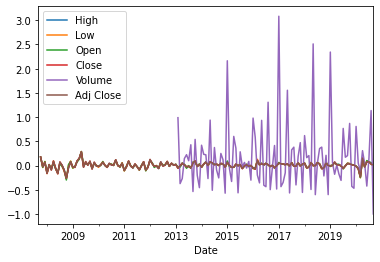

In [ ]:
nifty.plot()


In [ ]:
from scipy import stats 
import matplotlib.pyplot as plt

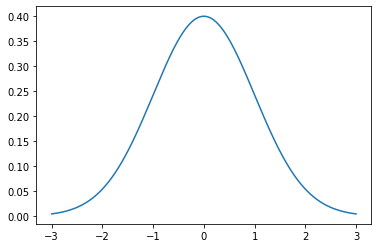

In [ ]:
x = np.linspace(-3,3,1000)
plt.plot(x, stats.norm.pdf(x))

In [ ]:
n_1 = 60
n_2 = 60
df = n_1 + n_2 -2
df

118

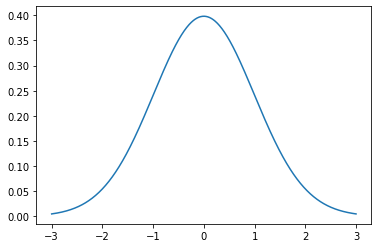

In [ ]:
xs = np.linspace(-3,3,1000)
plt.plot(xs, stats.t.pdf(xs, df))

In [ ]:
stats.t.isf(0.025, df)


1.9802722492407063

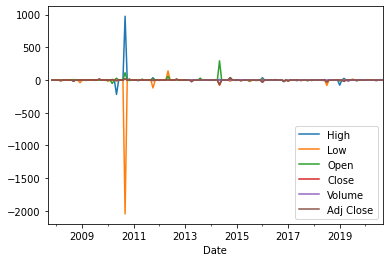

In [ ]:
returns = nifty.pct_change()
returns.plot()

In [ ]:
ts_1 = returns.loc['2007-11-01':'2008-12-31']
ts_1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-11-30,-1.160792,-1.225371,-1.229315,-1.133459,NaN,-1.133459
2007-12-31,-3.336501,-3.104171,-3.043972,-3.790749,NaN,-3.790749
2008-01-31,-3.229713,-3.046466,-2.849798,-3.500604,NaN,-3.500604
2008-02-29,-1.050190,-1.031930,-1.143988,-1.102700,NaN,-1.102700
2008-03-31,-9.716645,-15.426194,-3.975927,-6.589140,NaN,-6.589140


In [ ]:
ts_2 = returns.loc['2009-01-01':'2015-12-31']
ts_2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-01-31,-1.503416,-1.605220,-1.613045,-1.384874,NaN,-1.384874
2009-02-28,-0.196376,-0.574190,-0.740192,0.356391,NaN,0.356391
2009-03-31,-3.943379,-5.024399,-6.181168,-3.407989,NaN,-3.407989
2009-04-30,0.476272,0.416907,0.858759,0.610638,NaN,0.610638
2009-05-31,1.030796,1.143981,1.197765,0.871658,NaN,0.871658


In [ ]:
ts_1.count()


High         14
Low          14
Open         14
Close        14
Volume        0
Adj Close    14
dtype: int64

In [ ]:
ts_2.count()


High         84
Low          84
Open         84
Close        84
Volume       35
Adj Close    84
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f715ea75ac8>,
      dtype=object)

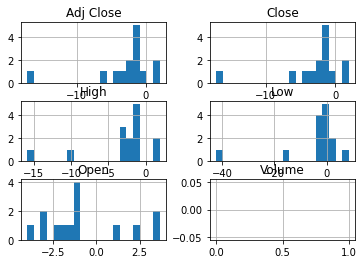

In [ ]:
ts_1.hist(bins=20)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f715e78a6d8>,
      dtype=object)

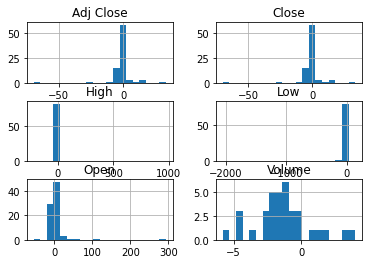

In [ ]:
ts_2.hist(bins=20)


In [ ]:
x_1 = ts_1.mean()
x_1

High        -2.902017
Low         -4.437957
Open        -0.671346
Close       -2.788982
Volume            NaN
Adj Close   -2.788982
dtype: float64

In [ ]:
x_2 = ts_2.mean()
x_2

High          8.703295
Low         -26.955144
Open          5.043243
Close        -1.281533
Volume       -1.375484
Adj Close    -1.281533
dtype: float64

In [ ]:
s_1 = ts_1.var()
s_1

High          21.314018
Low          143.001678
Open           5.889030
Close         21.567284
Volume              NaN
Adj Close     21.567284
dtype: float64

In [ ]:
s_2 = ts_2.var()
s_2

High         11988.644866
Low          50318.259645
Open          1286.028995
Close           95.047934
Volume           4.160754
Adj Close       95.047934
dtype: float64

In [ ]:
s_p = ((n_1-1)*s_1 + (n_2-1)*s_2)/df
s_p

High          6004.979442
Low          25230.630662
Open           645.959012
Close           58.307609
Volume                NaN
Adj Close       58.307609
dtype: float64

In [ ]:
((x_1-x_2)-0)/np.sqrt(((s_p/n_1)+(s_p/n_2)))


High        -0.820279
Low          0.776445
Open        -1.231525
Close       -1.081286
Volume            NaN
Adj Close   -1.081286
dtype: float64

In [ ]:
stats.ttest_ind(ts_1, ts_2, equal_var=True, nan_policy='omit')


/usr/local/lib/python3.6/dist-packages/scipy/stats/mstats_basic.py:1050: RuntimeWarning: divide by zero encountered in true_divide
  denom = ma.sqrt(svar*(1.0/n1 + 1.0/n2))  # n-D computation here!


Ttest_indResult(statistic=masked_array(data=[-0.3948194449299656, 0.37388830275817675,
                   -0.5934595391363946, -0.5660761841700311, --,
                   -0.5660761841700311],
             mask=[False, False, False, False,  True, False],
       fill_value=1e+20), pvalue=masked_array(data=[0.6938519786326975, 0.7093119009387769,
                   0.5542693417533704, 0.5726628872578843, --,
                   0.5726628872578843],
             mask=[False, False, False, False,  True, False],
       fill_value=1e+20))